In [218]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

train = pd.read_csv('tfidf_train_dataset.csv')
test = pd.read_csv('tfidf_test_dataset.csv')

train["CONDITION"] = train.CONDITION.map({"H":0, "D":1})
test["CONDITION"] = test.CONDITION.map({"H":0, "D":1})

X_train = train.iloc[:,0:12]
print(X_train.columns)
y_train = train['CONDITION']
X_test= test.iloc[:,0:12]
y_test = test['CONDITION']

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)

X_full = np.vstack((X_train, X_test))
print(X_full[0])
print(y_full)
y_full = np.concatenate((list(y_train), list(y_test)))

Index(['P1', 'N2', 'P3', 'M4', 'P5', 'M6', 'N7', 'N8', 'M9', 'P10', 'M11',
       'N12'],
      dtype='object')
[0.         0.22724803 0.54736471 0.58654729 0.37959255 0.52214941
 0.62856969 0.         0.58647678 0.55930478 0.59988846 0.40426497]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

In [4]:
# ALL metrics
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [116]:
from sklearn import model_selection
from sklearn.model_selection import cross_validate

df_results = pd.DataFrame(columns = ['model', 'accuracy', 'variance', 'precision', 'recall', 'roc_auc'])
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression(max_iter=1000)
scoring = {'acc': 'accuracy',
           'var' : 'explained_variance',
           'precision': 'precision',
           'recall': 'recall',
           'roc_auc': 'roc_auc'}

results = model_selection.cross_validate(modelCV, X_full, y_full, cv=kfold, scoring=scoring)
new_row = pd.Series(['Logistic Regression 12 variables', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()], index = df_results.columns)
                     
df_results.append(new_row, ignore_index=True)

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_se

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

,model,accuracy,variance,precision,recall,roc_auc
0,Logistic Regression 12 variables,NaN,NaN,NaN,NaN,NaN


In [181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for i in range(1,12):
    X_new = SelectKBest(chi2, k=i).fit_transform(X_full, y_full)

    kfold = model_selection.KFold(n_splits=10)
    modelCV = LogisticRegression(max_iter=1000)
    
    results = model_selection.cross_validate(modelCV, X_new, y_full, cv=kfold, scoring=scoring)
    df_results.loc[len(df_results)] = ['Logistic Regression ' + str(i) + ' variables', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_se

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_se

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_se

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

In [154]:
print(df_results.head(len(df_results)))

                               model accuracy variance precision recall  \
0    Logistic Regression 1 variables      NaN      NaN       NaN    NaN   
1    Logistic Regression 1 variables      NaN      NaN       NaN    NaN   
2    Logistic Regression 2 variables      NaN      NaN       NaN    NaN   
3    Logistic Regression 3 variables      NaN      NaN       NaN    NaN   
4    Logistic Regression 4 variables      NaN      NaN       NaN    NaN   
5    Logistic Regression 5 variables      NaN      NaN       NaN    NaN   
6    Logistic Regression 6 variables      NaN      NaN       NaN    NaN   
7    Logistic Regression 7 variables      NaN      NaN       NaN    NaN   
8    Logistic Regression 8 variables      NaN      NaN       NaN    NaN   
9    Logistic Regression 9 variables      NaN      NaN       NaN    NaN   
10  Logistic Regression 10 variables      NaN      NaN       NaN    NaN   
11  Logistic Regression 11 variables      NaN      NaN       NaN    NaN   
12  Logistic Regression 1

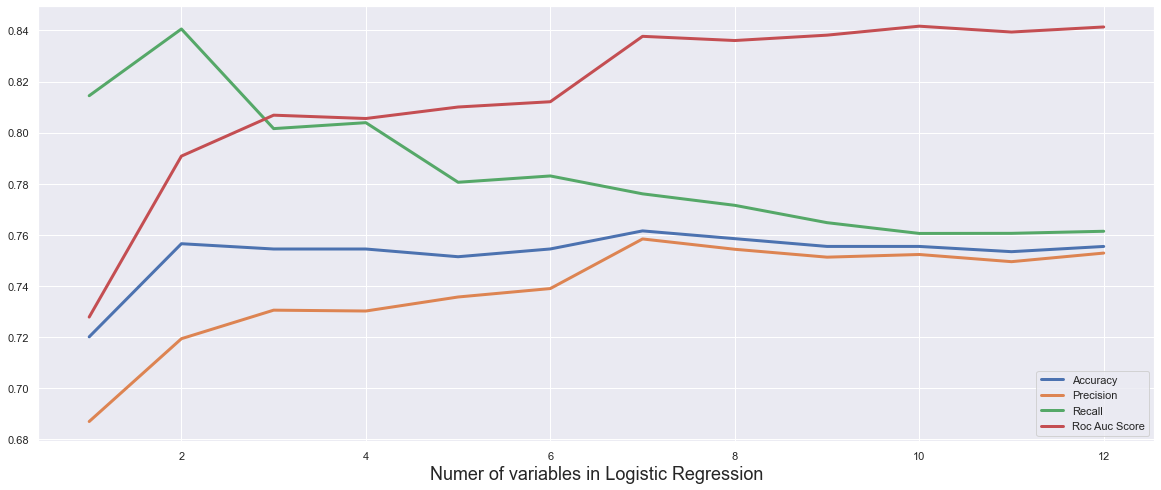

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style = 'darkgrid')
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(range(1,13), df_results['accuracy'], lw=3, label = 'Accuracy')
#plt.plot(range(1,13), df_results['variance'], lw=3, label = 'Variance')
plt.plot(range(1,13), df_results['precision'], lw=3, label = 'Precision')
plt.plot(range(1,13), df_results['recall'], lw=3, label = 'Recall')
plt.plot(range(1,13), df_results['roc_auc'], lw=3, label = 'Roc Auc Score')
plt.xlabel("Numer of variables in Logistic Regression", size=18)
plt.legend()
plt.savefig('LR-number-of-vars', transparent=True)

<BarContainer object of 12 artists>

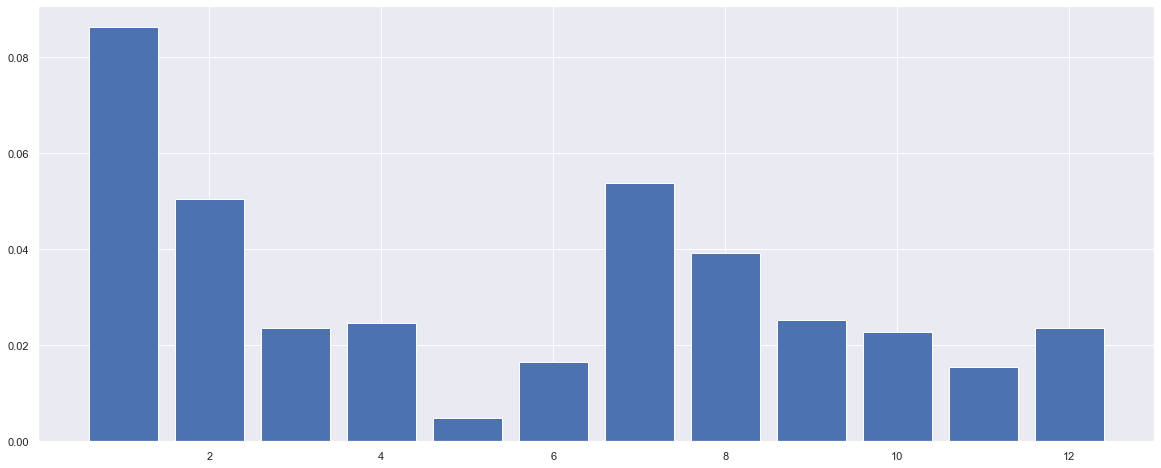

In [11]:
plt.bar(range(1,13), height=abs(df_results['variance']))

### Remove Machiavelism features because they are correlated

In [17]:
print(X_full.shape)

(986, 12)


In [159]:
X_removed = np.delete(X_full, [3, 5, 8, 10], 1)
print(X_removed.shape)

modelCV = LogisticRegression(max_iter=1000)
results = model_selection.cross_validate(modelCV, X_removed, y_full, cv=kfold, scoring=scoring)
print(['Logistic Regression without M features:', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()])

(986, 8)


c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python

['Logistic Regression without M features:', nan, nan, nan, nan, nan]


In [160]:
results = model_selection.cross_validate(modelCV, X_new, y_full, cv=kfold, scoring=scoring)
df_results.loc[len(df_results)] = ['Logistic Regression ' + str(i) + ' variables', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']}, cv=5).fit(X_removed, y_full)

print(clf.best_params_)

{'C': 1, 'kernel': 'poly'}


In [161]:
best_scores = pd.DataFrame(columns = ['model', 'accuracy', 'variance', 'precision', 'recall', 'roc_auc'])
X_new = SelectKBest(chi2, k=9).fit_transform(X_full, y_full)
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression(max_iter=1000)

results = model_selection.cross_validate(modelCV, X_new, y_full, cv=kfold, scoring=scoring)
best_scores.loc[len(best_scores)] = ['LR', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python

In [162]:
modelCV = SVC(C=1, kernel='poly')

results = model_selection.cross_validate(modelCV, X_full, y_full, cv=kfold, scoring=scoring)
best_scores.loc[len(best_scores)] = ['SVM (poly)', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

In [86]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
results = model_selection.cross_validate(clf, X_full, y_full, cv=kfold, scoring=scoring)
best_scores.loc[len(best_scores)] = ['Random forest', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

In [87]:
best_scores.head()

,model,accuracy,variance,precision,recall,roc_auc
0,LR,0.755483,0.025257,0.751282,0.764785,0.838174
1,SVM (poly),0.784982,0.149571,0.761461,0.835964,0.854615
2,Random forest,0.799134,0.195599,0.791380,0.814254,0.877966


In [88]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
results = model_selection.cross_validate(clf, X_full, y_full, cv=kfold, scoring=scoring)
best_scores.loc[len(best_scores)] = ['Naive Bayes', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

In [89]:
import sklearn
from sklearn.neural_network import MLPClassifier

hl_parameters = {'hidden_layer_sizes': [(10,), (50,),(100,), (10,10,)]}

mlp_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=0) 
clf = GridSearchCV(estimator=mlp_cv, param_grid=hl_parameters,cv=5).fit(X_removed, y_full)

In [90]:
mlp = MLPClassifier(hidden_layer_sizes = clf.best_params_['hidden_layer_sizes'], verbose=True, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=0)
results = model_selection.cross_validate(mlp, X_full, y_full, cv=kfold, scoring=scoring)
best_scores.loc[len(best_scores)] = ['MLP (100, )', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

Iteration 1, loss = 0.90805009
Iteration 2, loss = 0.65444526
Iteration 3, loss = 0.62139473
Iteration 4, loss = 0.58303663
Iteration 5, loss = 0.55523261
Iteration 6, loss = 0.51726709
Iteration 7, loss = 0.54363143
Iteration 8, loss = 0.49063501
Iteration 9, loss = 0.48648384
Iteration 10, loss = 0.47836318
Iteration 11, loss = 0.46233742
Iteration 12, loss = 0.46430857
Iteration 13, loss = 0.60528960
Iteration 14, loss = 0.46637679
Iteration 15, loss = 0.45518308
Iteration 16, loss = 0.59882939
Iteration 17, loss = 0.44996204
Iteration 18, loss = 0.43661603
Iteration 19, loss = 0.42899210
Iteration 20, loss = 0.43347545
Iteration 21, loss = 0.42412964
Iteration 22, loss = 0.43953056
Iteration 23, loss = 0.44208319
Iteration 24, loss = 0.44793650
Iteration 25, loss = 0.48135595
Iteration 26, loss = 0.42403074
Iteration 27, loss = 0.41723235
Iteration 28, loss = 0.39308441
Iteration 29, loss = 0.39517270
Iteration 30, loss = 0.39291036
Iteration 31, loss = 0.48935412
Iteration 32, los

Iteration 36, loss = 0.39066500
Iteration 37, loss = 0.39573889
Iteration 38, loss = 0.41612989
Iteration 39, loss = 0.38788852
Iteration 40, loss = 0.38700927
Iteration 41, loss = 0.39098168
Iteration 42, loss = 0.43969539
Iteration 43, loss = 0.40770835
Iteration 44, loss = 0.38917491
Iteration 45, loss = 0.39667374
Iteration 46, loss = 0.39056340
Iteration 47, loss = 0.37429875
Iteration 48, loss = 0.37239544
Iteration 49, loss = 0.36920158
Iteration 50, loss = 0.43836465
Iteration 51, loss = 0.37660903
Iteration 52, loss = 0.46732638
Iteration 53, loss = 0.39355403
Iteration 54, loss = 0.37223172
Iteration 55, loss = 0.36535167
Iteration 56, loss = 0.38623250
Iteration 57, loss = 0.38878579
Iteration 58, loss = 0.36281994
Iteration 59, loss = 0.35969357
Iteration 60, loss = 0.38803537
Iteration 61, loss = 0.41825013
Iteration 62, loss = 0.37380468
Iteration 63, loss = 0.38926201
Iteration 64, loss = 0.38042010
Iteration 65, loss = 0.36563149
Iteration 66, loss = 0.35631264
Iteratio

Iteration 17, loss = 0.45221871
Iteration 18, loss = 0.44579401
Iteration 19, loss = 0.52390525
Iteration 20, loss = 0.46005617
Iteration 21, loss = 0.44090552
Iteration 22, loss = 0.45584077
Iteration 23, loss = 0.43895116
Iteration 24, loss = 0.46021450
Iteration 25, loss = 0.49120237
Iteration 26, loss = 0.47311052
Iteration 27, loss = 0.42582523
Iteration 28, loss = 0.43420144
Iteration 29, loss = 0.41026147
Iteration 30, loss = 0.40812926
Iteration 31, loss = 0.46667435
Iteration 32, loss = 0.48705036
Iteration 33, loss = 0.45798084
Iteration 34, loss = 0.43772757
Iteration 35, loss = 0.40537844
Iteration 36, loss = 0.40006958
Iteration 37, loss = 0.40477189
Iteration 38, loss = 0.41607585
Iteration 39, loss = 0.40859706
Iteration 40, loss = 0.39324758
Iteration 41, loss = 0.41521070
Iteration 42, loss = 0.40066845
Iteration 43, loss = 0.50096429
Iteration 44, loss = 0.41358667
Iteration 45, loss = 0.42556638
Iteration 46, loss = 0.41026812
Iteration 47, loss = 0.38442904
Iteratio

Iteration 87, loss = 0.32974618
Iteration 88, loss = 0.32211615
Iteration 89, loss = 0.36368208
Iteration 90, loss = 0.32535163
Iteration 91, loss = 0.32920720
Iteration 92, loss = 0.33063286
Iteration 93, loss = 0.32987492
Iteration 94, loss = 0.37088814
Iteration 95, loss = 0.31579693
Iteration 96, loss = 0.31142539
Iteration 97, loss = 0.33526109
Iteration 98, loss = 0.32767339
Iteration 99, loss = 0.31436591
Iteration 100, loss = 0.34627590
Iteration 101, loss = 0.30699010
Iteration 102, loss = 0.31646659
Iteration 103, loss = 0.34805310
Iteration 104, loss = 0.31229371
Iteration 105, loss = 0.34594217
Iteration 106, loss = 0.30148152
Iteration 107, loss = 0.32949850
Iteration 108, loss = 0.29562479
Iteration 109, loss = 0.29880985
Iteration 110, loss = 0.32948715
Iteration 111, loss = 0.31239409
Iteration 112, loss = 0.29928357
Iteration 113, loss = 0.30748144
Iteration 114, loss = 0.28949926
Iteration 115, loss = 0.28796445
Iteration 116, loss = 0.32409471
Iteration 117, loss = 0

In [56]:
print(clf.best_params_['hidden_layer_sizes'])

(100,)


In [203]:
from xgboost import XGBClassifier
xgb = XGBClassifier() 
results = model_selection.cross_validate(xgb, X_full, y_full, cv=kfold, scoring=scoring)
best_scores.loc[len(best_scores)] = ['XGB', 
                 results['test_acc'].mean(), 
                 results['test_var'].mean(), 
                 results['test_precision'].mean(),
                 results['test_recall'].mean(),
                 results['test_roc_auc'].mean()]

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[11:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python

[11:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_se

[11:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\l

[11:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 362, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:

[11:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [92]:
best_scores

,model,accuracy,variance,precision,recall,roc_auc
0,LR,0.755483,0.025257,0.751282,0.764785,0.838174
1,SVM (poly),0.784982,0.149571,0.761461,0.835964,0.854615
2,Random forest,0.799134,0.195599,0.791380,0.814254,0.877966
3,Naive Bayes,0.744475,0.011031,0.704097,0.845126,0.824518
4,"MLP (100, )",0.792115,0.170794,0.784868,0.815346,0.872664
5,XGB,0.795094,0.183803,0.794995,0.804743,0.871509


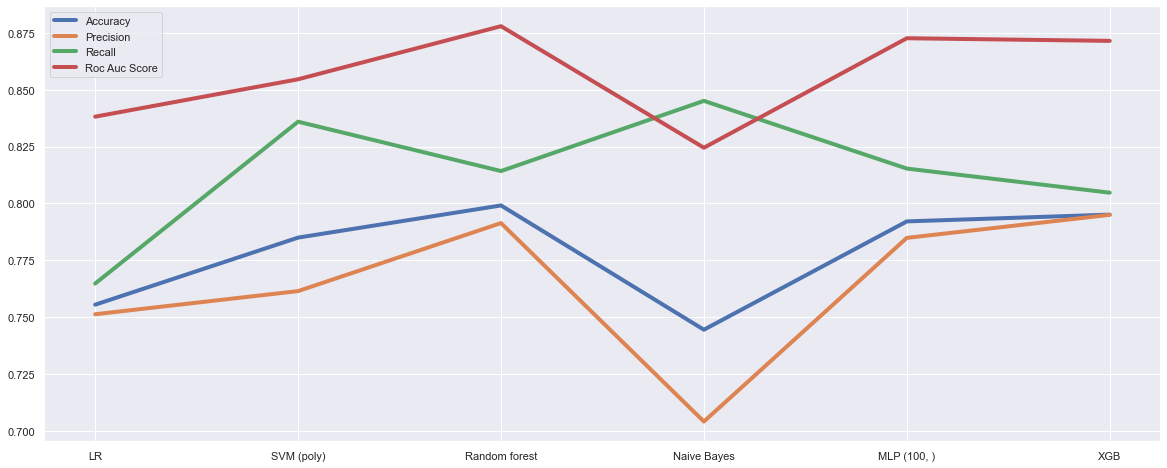

In [93]:
plt.plot(range(len(best_scores)), best_scores['accuracy'], lw=4, label = 'Accuracy')
plt.plot(range(len(best_scores)), best_scores['precision'], lw=4, label = 'Precision')
plt.plot(range(len(best_scores)), best_scores['recall'], lw=4, label = 'Recall')
plt.plot(range(len(best_scores)), best_scores['roc_auc'], lw=4, label = 'Roc Auc Score')
plt.xticks(range(len(best_scores)), best_scores['model'])
plt.legend()
plt.savefig('classification-comparison', transparent=True)

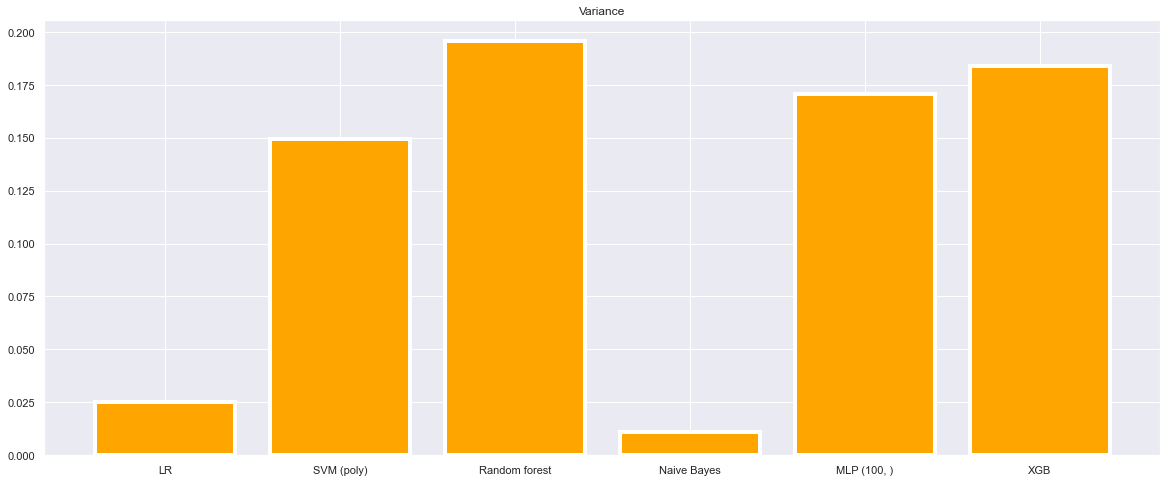

In [99]:
plt.bar(range(len(best_scores)), best_scores['variance'], lw=4, label = 'Accuracy', color='orange')
plt.xticks(range(len(best_scores)), best_scores['model'])
plt.title('Variance')
plt.savefig('classification-variance', transparent=True)

## TF-IDF

In [193]:
tf_idf_scores = pd.DataFrame(columns = ['model', 'accuracy', 'precision', 'recall', 'variance',  'roc_auc'])

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

tf_idf_scores.loc[len(tf_idf_scores)] = ['Logistic Regression', 
                 metrics.accuracy_score(y_test, y_pred), 
                 metrics.precision_score(y_test, y_pred), 
                 metrics.recall_score(y_test, y_pred),
                 metrics.explained_variance_score(y_test, y_pred),
                 metrics.roc_auc_score(y_test, y_pred)]
tf_idf_scores

,model,accuracy,precision,recall,variance,roc_auc
0,Logistic Regression,0.9,0.934783,0.86,0.6064,0.9


In [194]:
model_logreg =  SVC(C=1, kernel='poly')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

tf_idf_scores.loc[len(tf_idf_scores)] = ['SVM (poly)', 
                 metrics.accuracy_score(y_test, y_pred), 
                 metrics.precision_score(y_test, y_pred), 
                 metrics.recall_score(y_test, y_pred),
                 metrics.explained_variance_score(y_test, y_pred),
                 metrics.roc_auc_score(y_test, y_pred)]

tf_idf_scores

,model,accuracy,precision,recall,variance,roc_auc
0,Logistic Regression,0.90,0.934783,0.86,0.6064,0.90
1,SVM (poly),0.97,0.979592,0.96,0.8804,0.97


In [196]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

tf_idf_scores.loc[len(tf_idf_scores)] = ['Naive Bayes', 
                 metrics.accuracy_score(y_test, y_pred), 
                 metrics.precision_score(y_test, y_pred), 
                 metrics.recall_score(y_test, y_pred),
                 metrics.explained_variance_score(y_test, y_pred),
                 metrics.roc_auc_score(y_test, y_pred)]

tf_idf_scores

,model,accuracy,precision,recall,variance,roc_auc
0,Logistic Regression,0.90,0.934783,0.86,0.6064,0.90
1,SVM (poly),0.97,0.979592,0.96,0.8804,0.97
2,Naive Bayes,0.97,0.979592,0.96,0.8804,0.97


In [198]:
mlp = MLPClassifier(hidden_layer_sizes = (100,), verbose=True, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

tf_idf_scores.loc[len(tf_idf_scores)] = ['MLP', 
                 metrics.accuracy_score(y_test, y_pred), 
                 metrics.precision_score(y_test, y_pred), 
                 metrics.recall_score(y_test, y_pred),
                 metrics.explained_variance_score(y_test, y_pred),
                 metrics.roc_auc_score(y_test, y_pred)]

tf_idf_scores

Iteration 1, loss = 0.66291623
Iteration 2, loss = 0.50044754
Iteration 3, loss = 0.37053032
Iteration 4, loss = 0.31662253
Iteration 5, loss = 0.29897824
Iteration 6, loss = 0.28762689
Iteration 7, loss = 0.27800700
Iteration 8, loss = 0.26862624
Iteration 9, loss = 0.26219864
Iteration 10, loss = 0.25431372
Iteration 11, loss = 0.24692167
Iteration 12, loss = 0.24225210
Iteration 13, loss = 0.24124194
Iteration 14, loss = 0.23053739
Iteration 15, loss = 0.22653508
Iteration 16, loss = 0.22221905
Iteration 17, loss = 0.21505468
Iteration 18, loss = 0.20991215
Iteration 19, loss = 0.20500915
Iteration 20, loss = 0.20013058
Iteration 21, loss = 0.19434203
Iteration 22, loss = 0.18913623
Iteration 23, loss = 0.18242874
Iteration 24, loss = 0.17789876
Iteration 25, loss = 0.17177829
Iteration 26, loss = 0.16742005
Iteration 27, loss = 0.16371081
Iteration 28, loss = 0.15832532
Iteration 29, loss = 0.15595262
Iteration 30, loss = 0.14841591
Iteration 31, loss = 0.14369016
Iteration 32, los

,model,accuracy,precision,recall,variance,roc_auc
0,Logistic Regression,0.90,0.934783,0.86,0.6064,0.90
1,SVM (poly),0.97,0.979592,0.96,0.8804,0.97
2,Naive Bayes,0.97,0.979592,0.96,0.8804,0.97
3,MLP,0.97,0.979592,0.96,0.8804,0.97


In [199]:
from xgboost import XGBClassifier
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

tf_idf_scores.loc[len(tf_idf_scores)] = ['XGB', 
                 metrics.accuracy_score(y_test, y_pred), 
                 metrics.precision_score(y_test, y_pred), 
                 metrics.recall_score(y_test, y_pred),
                 metrics.explained_variance_score(y_test, y_pred),
                 metrics.roc_auc_score(y_test, y_pred)]

tf_idf_scores

c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,accuracy,precision,recall,variance,roc_auc
0,Logistic Regression,0.90,0.934783,0.86,0.6064,0.90
1,SVM (poly),0.97,0.979592,0.96,0.8804,0.97
2,Naive Bayes,0.97,0.979592,0.96,0.8804,0.97
3,MLP,0.97,0.979592,0.96,0.8804,0.97
4,XGB,1.00,1.000000,1.00,1.0000,1.00


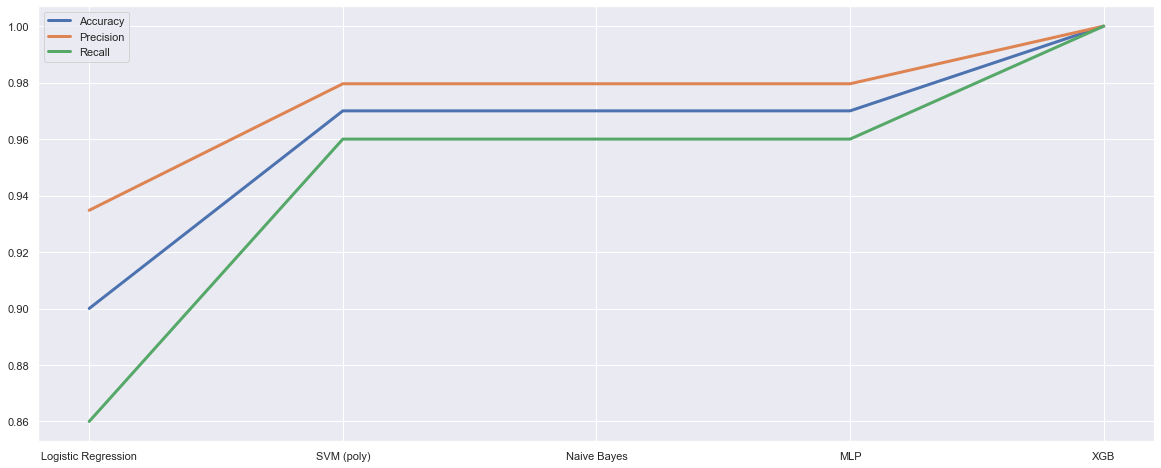

In [240]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style = 'darkgrid')
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(range(len(tf_idf_scores)), tf_idf_scores['accuracy'], lw=3, label = 'Accuracy')
#plt.plot(range(1,13), df_results['variance'], lw=3, label = 'Variance')
plt.plot(range(len(tf_idf_scores)), tf_idf_scores['precision'], lw=3, label = 'Precision')
plt.plot(range(len(tf_idf_scores)), tf_idf_scores['recall'], lw=3, label = 'Recall')
#plt.plot(range(len(tf_idf_scores)), tf_idf_scores['roc_auc'], lw=3, label = 'Roc Auc Score')
plt.xticks(range(len(tf_idf_scores)), tf_idf_scores['model'])
plt.legend()
plt.savefig('classification-comparison-tfidf', transparent=True)

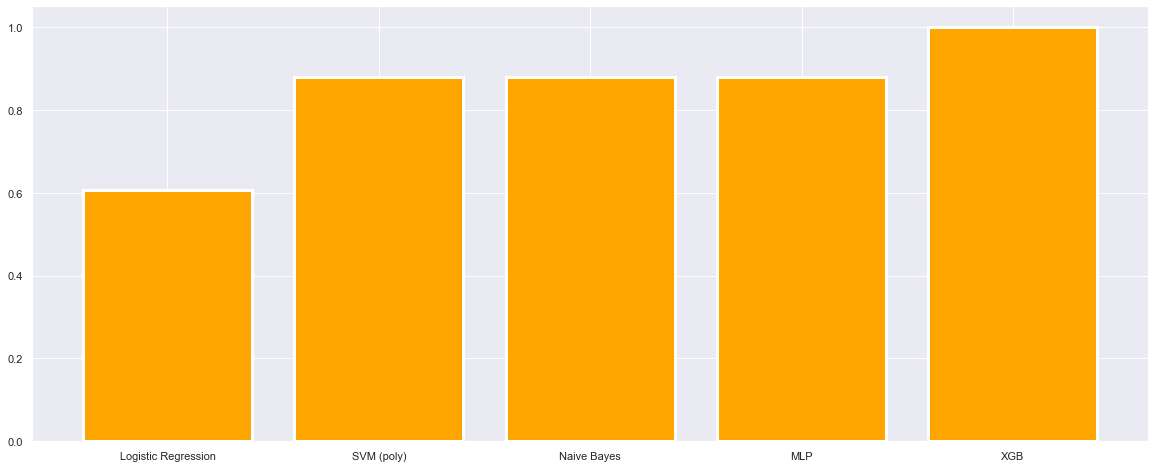

In [244]:
plt.bar(range(len(tf_idf_scores)), tf_idf_scores['variance'], lw=3, label = 'Variance', color='orange')
plt.xticks(range(len(tf_idf_scores)), tf_idf_scores['model'])
plt.savefig('variance-comparison-tfidf', transparent=True)

In [238]:
# Benchmark accuracy for classification:

avg_vector = X_train.mean(axis=0)

# Substract the average vector for each test row and calculate the sum of differences
difference_sum = (X_test - avg_vector).sum(axis=1)
print(difference_sum)

# If the sum is positive, classify the row as honest, otherwise classify as dishonest
classification = np.sign(difference_sum)

print("Prediction vector: ")
print(list(classification))

comparison_vector = y_test.replace(1, -1).replace(0, 1)
print(y_test)
print(comparison_vector)

# Count the number of equal classifications
print("\nAccuracy: ")
print(sum(classification == comparison_vector) / len(classification))

[ 0.43529056  0.57271764  3.7611601   2.13044698  2.32129428  1.97789103
  2.19858361  1.02868231  0.69740113  1.76684713  2.81182809  0.29757316
 -0.10770738  2.33644924  1.86226337  1.07490633  1.00312938 -0.03567019
  0.52575622  1.42267122  1.96685585  0.76119091  1.29247217  1.13110492
  1.40604664  6.32777539  2.83440722  0.80469332  1.2689222   2.54520975
  2.85897555  0.93780365  2.26353365  1.41753127  1.77527232  1.24220884
  2.20562041  1.46810317  3.38973959  2.2587729   3.97118167  1.5623755
  4.60032738  2.02454089  1.09582523  0.63200621  0.69629285  2.51091006
  3.09060612  2.56813783 -3.35961719 -3.45612175  3.7149634   2.67502657
 -2.00279211 -2.85558506  1.96542886 -2.33392233 -3.90077622  3.86925874
 -1.89745011  2.60822225 -2.38151461 -2.63745322 -3.46596493 -3.66132587
 -2.30637806 -1.87656994 -3.18050081 -1.92561358 -0.3784647   0.44102275
 -1.92172271 -1.545835   -2.22658501 -1.15922156 -3.46596493 -3.62179303
 -1.47700563 -2.18853127 -3.70072537 -2.10019069 -3.